In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [3]:
jpeg_map = pd.read_csv("../measurements/jpeg_snr/map.csv")
decom_map= pd.read_csv("../measurements/decomposition_snr/map.csv")
reg_map = pd.read_csv("../measurements/regression_snr/map.csv")
jpeg_cha = pd.read_csv("../measurements/jpeg_snr/characteristic.csv")
decom_cha= pd.read_csv("../measurements/decomposition_snr/characteristic.csv")
reg_cha = pd.read_csv("../measurements/regression_snr/characteristic.csv")

In [4]:
local_map = pd.read_csv("../../dynamic_framework/measurements/local/map.csv")

In [5]:
coef_map = [-2.15430309e-05,  2.53090430e-03, -1.10683795e-01,  2.17196770e+00, -1.94865597e+01,  1.09932162e+02]
coef_sens = [-3.37021127e-05,  3.59472798e-03, -1.40599955e-01,  2.46219543e+00,-2.03229254e+01,  1.13382156e+02]

In [6]:
poly_map = np.poly1d(coef_map)
poly_sens = np.poly1d(coef_sens)
upper_bound_x = np.linspace(0, 40, 100)
upper_bound_map = poly_map(upper_bound_x)
upper_bound_sens = poly_sens(upper_bound_x)

In [58]:
pruning = [0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [60,70,80,90,100]

snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []
cmp_ratio = []

map_df_group = jpeg_map.groupby("pruning_thresh")
cha_df_group =jpeg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy()) *100
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())*100
        sens_diff += sens_des.tolist()
        cmp_ratio+=cha_plot_df["datasize_est"].to_list()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)
cmp_ratio = (128*26*26*4)/np.array(cmp_ratio)

snr_cleaned = snr[np.isnan(snr) ==False]
map_diff = map_diff[np.isnan(snr) ==False]
cmp_ratio = cmp_ratio[np.isnan(snr) ==False]
sens_diff = sens_diff[np.isnan(snr) ==False]

Text(0, 0.5, 'Compression ratio')

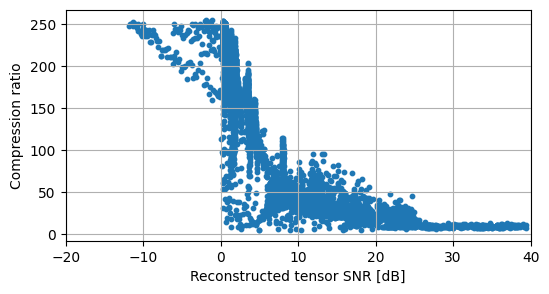

In [59]:

plt.figure(figsize=(6,3))
plt.scatter(snr_cleaned,cmp_ratio, s=10,label="cmp_ratio")
plt.grid()
plt.xlim([-20, 40])
# plt.ylim([-40,100])
plt.xlabel("Reconstructed tensor SNR [dB]")
plt.ylabel("Compression ratio")

In [54]:
pruning = [0,0.05, 0.1, 0.15, 0.2, 0.25,0.3]
quality = [1,2,3,4,5]

snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []
cmp_ratio = []

map_df_group = reg_map.groupby("pruning_thresh")
cha_df_group =reg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy()) *100
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())*100
        sens_diff += sens_des.tolist()
        cmp_ratio+=cha_plot_df["datasize_est"].to_list()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)
cmp_ratio = (128*26*26*4)/np.array(cmp_ratio)

snr_cleaned = snr[np.isnan(snr) ==False]
map_diff = map_diff[np.isnan(snr) ==False]
cmp_ratio = cmp_ratio[np.isnan(snr) ==False]
sens_diff = sens_diff[np.isnan(snr) ==False]

Text(0, 0.5, 'Compression ratio')

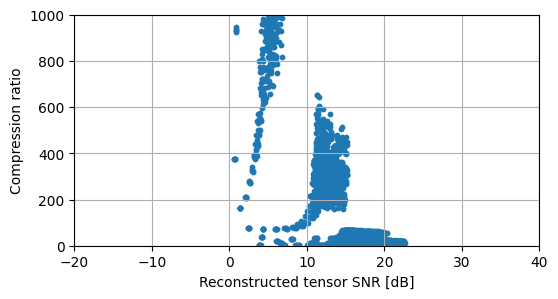

In [57]:

plt.figure(figsize=(6,3))
plt.scatter(snr_cleaned,cmp_ratio, s=10,label="cmp_ratio")
plt.grid()
plt.xlim([-20, 40])
plt.ylim([0,1000])
plt.xlabel("Reconstructed tensor SNR [dB]")
plt.ylabel("Compression ratio")

In [45]:
pruning = [0.05, 0.1, 0.15, 0.2, 0.25,0.3, 0.35]
quality = [2,4,6,8,10]

snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []
cmp_ratio = []

map_df_group = decom_map.groupby("pruning_thresh")
cha_df_group =decom_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy()) *100
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())*100
        sens_diff += sens_des.tolist()
        cmp_ratio+=cha_plot_df["datasize_est"].to_list()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)
cmp_ratio = (128*26*26*4)/np.array(cmp_ratio)

snr_cleaned = snr[np.isnan(snr) ==False]
map_diff = map_diff[np.isnan(snr) ==False]
cmp_ratio = cmp_ratio[np.isnan(snr) ==False]
sens_diff = sens_diff[np.isnan(snr) ==False]

/tmp/ipykernel_206353/1108723156.py:35: RuntimeWarning: divide by zero encountered in divide
  cmp_ratio = (128*26*26*4)/np.array(cmp_ratio)


Text(0, 0.5, 'Compression ratio')

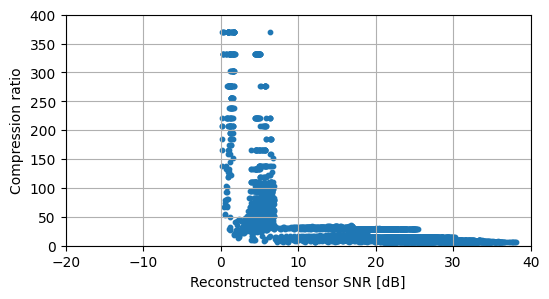

In [53]:
plt.figure(figsize=(6,3))
plt.scatter(snr_cleaned,cmp_ratio, s=10,label="cmp_ratio")
plt.grid()
plt.xlim([-20, 40])
plt.ylim([0,400])
plt.xlabel("Reconstructed tensor SNR [dB]")
plt.ylabel("Compression ratio")